In [3]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
from PIL import Image
import os
import re
import itertools

AudioSegment.converter = r"C:\Users\levis\miscApps\ffmpeg_build\bin\ffmpeg.exe"



#       C:\Git_repos\ENDG 511\ENDG511_Final_Project\audio_processing\audio_sample.mp3

cwd = r"C:/Git_repos/ENDG 511/ENDG511_Final_Project/audio_processing/"
# mp3_file = cwd+"audio_sample.mp3"  # Change this to your MP3 file
output_folder = cwd+"spectrograms"  # Folder to save spectrogram images
os.makedirs(output_folder, exist_ok=True)
# Load MP3 file
# audio = AudioSegment.from_mp3(mp3_file)
# audio = audio.set_channels(1)

In [ ]:
# Set sample rate (reduces storage if needed)
sr = 16000 
# sr = 32000

n_fft=2048 # number of frequency bins
win_length1 = 750 #default: N_fft
win_length2 = 1500 #default: N_fft
hop_length=win_length1//4 #default: win_length//4
segment_length = 3 * 1000  # 5 seconds in milliseconds

audio = audio.set_frame_rate(sr)
num_segments = len(audio) // segment_length  # Ignore remainder




#resolution:
hop_resolution = hop_length/sr
print(f'hop resolution: {hop_resolution*1000}ms , {1/hop_resolution}Hz')
print(f'window length: {win_length1/sr*1000}ms , {sr/win_length1}Hz')
print(f'x size: {(sr*segment_length/1000)//hop_length+1}')
print(f'y size: {n_fft//2+1}')




hop resolution: 11.6875ms , 85.56149732620321Hz
window length: 46.875ms , 21.333333333333332Hz
x size: 257.0
y size: 1025


In [ ]:

S0 =0
for i in range(num_segments):
    # Extract segment
    segment = audio[i * segment_length : (i + 1) * segment_length]

    # Convert to NumPy array and normalize
    samples = np.array(segment.get_array_of_samples()).astype(np.float32) / 2**15

    # Compute spectrogram using STFT
    S = librosa.stft(samples, n_fft=n_fft,win_length = win_length1, hop_length=hop_length)  

    #The number of rows in the STFT matrix D is (1 + n_fft/2).
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
    S0 = S_db
    print(type(S_db))
    # Save spectrogram as PNG
    # plt.figure(figsize=(2.56, 2.56), dpi=100)  # 2.56 inches * 100 dpi = 256 pixels
    # librosa.display.specshow(S_db, sr=sr, n_fft=n_fft, win_length=win_length1, hop_length=hop_length, x_axis="time", y_axis="log", cmap="gray")
    # # plt.axis("on")  # Remove axis for compact storage
    # output_file = os.path.join(output_folder, f"spectrogram_{segment_length}_{i:03d}.png")
    # plt.savefig(output_file, bbox_inches="tight", pad_inches=0)
    # plt.close()

    fig, ax = plt.subplots(figsize=(2.56, 2.56), dpi=100)  # 256x256 pixels
    librosa.display.specshow(S_db, sr=sr, n_fft=n_fft, win_length=win_length1, hop_length=hop_length, x_axis="time", y_axis="log", cmap="gray")

    # Remove axes for a clean image
    ax.set_axis_off()
    plt.tight_layout(pad=0)
    print(plt.ylim())
    plt.ylim([30,6000])


    # Save the figure to a temporary buffer
    temp_file = os.path.join(output_folder, f"temp_spectrogram.png")
    plt.savefig(temp_file, bbox_inches="tight", pad_inches=0, dpi=100)
    plt.close(fig)

    # Load and process the image
    img = Image.open(temp_file).convert("L")  # Convert to grayscale ('L' mode)
    img = img.resize((256, 256))  # Ensure correct dimensions

    # Convert to numpy and reshape to (1,256,256)
    img_array = np.array(img, dtype=np.uint8)  # Convert to NumPy array
    img_array = img_array[np.newaxis, :, :]  # Add channel dimension (1,256,256)

    # Save final processed image
    output_file = os.path.join(output_folder, f"spectrogram_{segment_length}_{i:03d}.png")
    Image.fromarray(img_array.squeeze()).save(output_file)

    print(f"Saved: {output_file}")

print("All spectrograms generated successfully.")

<class 'numpy.ndarray'>
(np.float64(-3.90625), np.float64(8003.90625))
Saved: C:/Git_repos/ENDG 511/ENDG511_Final_Project/audio_processing/spectrograms\spectrogram_3000_000.png
<class 'numpy.ndarray'>
(np.float64(-3.90625), np.float64(8003.90625))
Saved: C:/Git_repos/ENDG 511/ENDG511_Final_Project/audio_processing/spectrograms\spectrogram_3000_001.png
<class 'numpy.ndarray'>
(np.float64(-3.90625), np.float64(8003.90625))
Saved: C:/Git_repos/ENDG 511/ENDG511_Final_Project/audio_processing/spectrograms\spectrogram_3000_002.png
<class 'numpy.ndarray'>
(np.float64(-3.90625), np.float64(8003.90625))
Saved: C:/Git_repos/ENDG 511/ENDG511_Final_Project/audio_processing/spectrograms\spectrogram_3000_003.png
All spectrograms generated successfully.


In [7]:

S0 =0
def convert_to_png(file_name,class_name, output_folder, num_segments = None, audio_type = "mp3"):
    """
    params


    """
    sr = 16000 
    n_fft=2048 
    win_length1 = 750 
    hop_length=win_length1//4 
    segment_length = 3 * 1000 
    audio = AudioSegment.from_mp3(file_name)
    audio = audio.set_channels(1)
    audio = audio.set_frame_rate(sr)
    if num_segments is None:
        num_segments = len(audio) // segment_length  # Ignore remainder
    for i in range(num_segments):
    # Extract segment
        segment = audio[i * segment_length : (i + 1) * segment_length]

    # Convert to NumPy array and normalize
        samples = np.array(segment.get_array_of_samples()).astype(np.float32) / 2**15

    # Compute spectrogram using STFT
        S = librosa.stft(samples, n_fft=n_fft,win_length = win_length1, hop_length=hop_length)  

    #The number of rows in the STFT matrix D is (1 + n_fft/2).
        S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
        S0 = S_db
        # print(type(S_db))
        # Save spectrogram as PNG
        # plt.figure(figsize=(2.56, 2.56), dpi=100)  # 2.56 inches * 100 dpi = 256 pixels
        # librosa.display.specshow(S_db, sr=sr, n_fft=n_fft, win_length=win_length1, hop_length=hop_length, x_axis="time", y_axis="log", cmap="gray")
        # # plt.axis("on")  # Remove axis for compact storage
        # output_file = os.path.join(output_folder, f"spectrogram_{segment_length}_{i:03d}.png")
        # plt.savefig(output_file, bbox_inches="tight", pad_inches=0)
        # plt.close()

        fig, ax = plt.subplots(figsize=(2.56, 2.56), dpi=100)  # 256x256 pixels
        librosa.display.specshow(S_db, sr=sr, n_fft=n_fft, win_length=win_length1, hop_length=hop_length, x_axis="time", y_axis="log", cmap="gray")

        # Remove axes for a clean image
        ax.set_axis_off()
        plt.tight_layout(pad=0)
        # print(plt.ylim())
        plt.ylim([30,6000])


    # Save the figure to a temporary buffer
        os.makedirs(output_folder, exist_ok=True)
        temp_file = os.path.join(output_folder, f"temp_spectrogram.png")
        fig.savefig(temp_file, bbox_inches="tight", pad_inches=0, dpi=100)
        plt.close(fig)

    # Load and process the image
        with Image.open(temp_file) as img:
            img = Image.open(temp_file).convert("L")  # Convert to grayscale ('L' mode)
            img = img.resize((256, 256))  # Ensure correct dimensions

        # Convert to numpy and reshape to (1,256,256)
            img_array = np.array(img, dtype=np.uint8)  # Convert to NumPy array
            img_array = img_array[np.newaxis, :, :]  # Add channel dimension (1,256,256)

        # Save final processed image
            numbers = re.findall(r'\d+', file_name)
            if numbers:
                file_number = int(numbers[-2])  # Get the 2nd last number
            output_file = os.path.join(output_folder, class_name+f"_{file_number}{i:03d}.png")
            Image.fromarray(img_array.squeeze()).save(output_file)

        # print(f"Saved: {output_file}")
    return num_segments


In [ ]:


filename = "common_voice_es_18745258.mp3"


18745258


In [ ]:
print("shape",np.shape(S0))

shape (513, 188)
hop resolution: 16.0ms , 62.5Hz
window length: 64.0ms , 15.625Hz


In [8]:
folders = {
    "english" : r"D:\voice_data\english\cv-corpus-20.0-2024-12-06\en\clips",
    "arabic" : r"D:\voice_data\arabic\cv-corpus-20.0-2024-12-06\ar\clips",
    "german" : r"D:\voice_data\german\cv-corpus-20.0-2024-12-06\de\clips",
    "mandarin": r"D:\voice_data\mandarin\cv-corpus-20.0-2024-12-06\zh-TW\clips",
    "spanish" : r"D:\voice_data\spanish\cv-corpus-20.0-2024-12-06\es\clips",
    "french"  : r"C:\Users\levis\Downloads\french\cv-corpus-20.0-2024-12-06\fr\clips"
}
class_names = [
    # "english" ,
    # "arabic"  ,
    # "german"  ,
    # "mandarin",
    # "spanish",
     "french"  ]

max_files = 1000
output_folder = r"C:\Git_repos\ENDG 511\ENDG511_Final_Project\audio_processing\sample_dataset"
for name in class_names:
    folder_path = folders[name]
    mp3files = [entry.path for entry in itertools.islice(os.scandir(folder_path), max_files*2)]
    class_output_folder = output_folder+"\\"+name
    file_count = 0
    for file in mp3files:
        file_count+=convert_to_png(file,name, class_output_folder)
        if file_count>=max_files:
            break
    print(name+f': {file_count} files')




french: 1001 files


In [18]:
name = "english"
# mp3files = os.listdir(folders["english"])[: max_files]
folder_path = folders[name]

# Use os.scandir() for better performance and islice() to limit to 100 files
# mp3files = [entry.name for entry in itertools.islice(os.scandir(folder_path), 100)]
mp3files = [entry.path for entry in itertools.islice(os.scandir(folder_path), 100)]
print(mp3files)

['D:\\voice_data\\english\\cv-corpus-20.0-2024-12-06\\en\\clips\\common_voice_en_1.mp3', 'D:\\voice_data\\english\\cv-corpus-20.0-2024-12-06\\en\\clips\\common_voice_en_10.mp3', 'D:\\voice_data\\english\\cv-corpus-20.0-2024-12-06\\en\\clips\\common_voice_en_100.mp3', 'D:\\voice_data\\english\\cv-corpus-20.0-2024-12-06\\en\\clips\\common_voice_en_1000.mp3', 'D:\\voice_data\\english\\cv-corpus-20.0-2024-12-06\\en\\clips\\common_voice_en_10000.mp3', 'D:\\voice_data\\english\\cv-corpus-20.0-2024-12-06\\en\\clips\\common_voice_en_100000.mp3', 'D:\\voice_data\\english\\cv-corpus-20.0-2024-12-06\\en\\clips\\common_voice_en_100001.mp3', 'D:\\voice_data\\english\\cv-corpus-20.0-2024-12-06\\en\\clips\\common_voice_en_100002.mp3', 'D:\\voice_data\\english\\cv-corpus-20.0-2024-12-06\\en\\clips\\common_voice_en_100003.mp3', 'D:\\voice_data\\english\\cv-corpus-20.0-2024-12-06\\en\\clips\\common_voice_en_100004.mp3', 'D:\\voice_data\\english\\cv-corpus-20.0-2024-12-06\\en\\clips\\common_voice_en_1000

In [ ]:
file_name = r"D:\voice_data\english\cv-corpus-20.0-2024-12-06\en\clips\common_voice_es_18745258.mp3"


18745258


In [8]:
print(audio[0:])

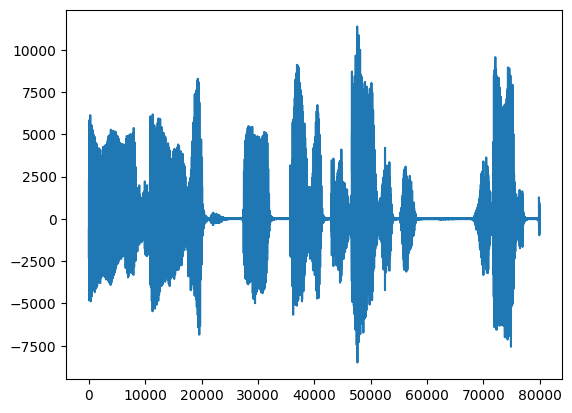

In [15]:
samples = np.array(segment.get_array_of_samples())
plt.plot(samples)


In [21]:
audio = AudioSegment.from_mp3(mp3_file)

# Convert to mono (reduces storage)
audio = audio.set_channels(1)

# Set sample rate (reduces storage if needed)
print(audio.frame_rate)
sr = 32000
audio = audio.set_frame_rate(sr)

# Split into 5-second chunks
segment_length = 5 * 1000  # 5 seconds in milliseconds
num_segments = len(audio) // segment_length  # Ignore remainder


segment = audio[0:segment_length]

# Convert to NumPy array and normalize
samples = np.array(segment.get_array_of_samples()).astype(np.float32) / 2**15

allsamples = np.array(audio.get_array_of_samples())
print(len(samples))
print(len(allsamples))
# Compute spectrogram using STFT
S = librosa.stft(samples, n_fft=1024, hop_length=512)  
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

32000
160000
466560


In [4]:
import numpy as np
from PIL import Image

# Assuming your array is named 'arr' and has shape (1, 256*256)
arr = np.random.randint(0, 256, (256,256,3), dtype=np.uint8)  # Example data

# Convert to grayscale image
img = Image.fromarray(arr, mode='RGB')

# Save as PNG
img.save("noise.png")